<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [1]:
!pip install yfinance
!pip install matplotlib
# !pip install pandas==1.3.3

In [2]:
import yfinance as yf
import pandas as pd

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL")

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


In [4]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

--2025-10-17 08:34:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json.1’

apple.json.1        100%[===================>]   5.57K  --.-KB/s    in 0s      

2025-10-17 08:34:47 (461 MB/s) - ‘apple.json.1’ saved [5699/5699]



### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [5]:
import json
with open('apple.json') as json_file:
    apple_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
apple_info

{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [6]:
apple_info['country']

'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [7]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [8]:
apple_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098485,0.098913,0.098485,0.098485,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093775,0.093775,0.093347,0.093347,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086924,0.086924,0.086495,0.086495,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088636,0.089064,0.088636,0.088636,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091206,0.091634,0.091206,0.091206,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [9]:
apple_share_price_data.reset_index(inplace=True)

We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

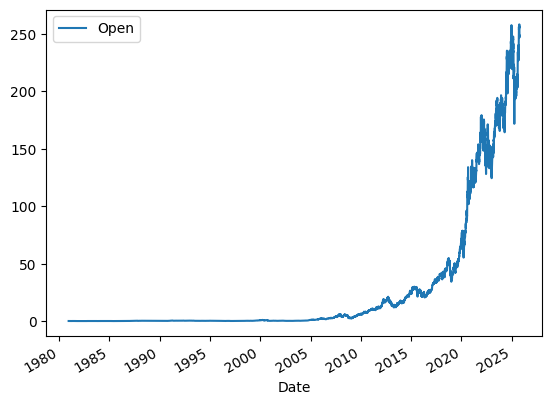

In [10]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [11]:
apple.dividends

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2024-08-12 00:00:00-04:00    0.250000
2024-11-08 00:00:00-05:00    0.250000
2025-02-10 00:00:00-05:00    0.250000
2025-05-12 00:00:00-04:00    0.260000
2025-08-11 00:00:00-04:00    0.260000
Name: Dividends, Length: 88, dtype: float64

We can plot the dividends overtime:


<Axes: xlabel='Date'>

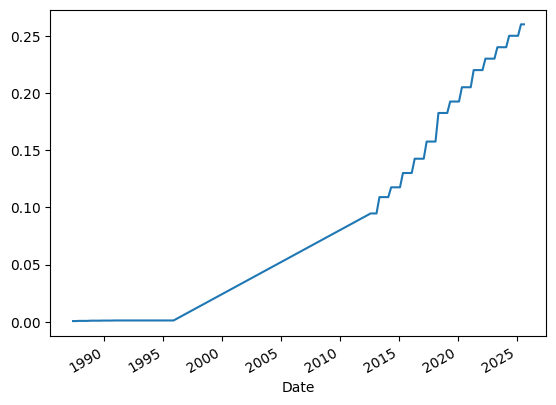

In [12]:
apple.dividends.plot()

## Exercise 


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [13]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2025-10-17 08:34:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json.1’

amd.json.1          100%[===================>]   5.70K  --.-KB/s    in 0s      

2025-10-17 08:34:50 (561 MB/s) - ‘amd.json.1’ saved [5838/5838]



In [14]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    # Print the type of data variable    
    #print("Type:", type(apple_info))
amd_info

{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


<!-- ## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>-->

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>


In [15]:
import yfinance as yf
import pandas as pd

# Extract Tesla data
tesla = yf.Ticker("TSLA")

# Get stock price history
tesla_data = tesla.history(period="max")

# Reset index to turn Date into a column
tesla_data.reset_index(inplace=True)

# Display first 5 rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [16]:
import requests
from bs4 import BeautifulSoup

# Scrape Tesla revenue data from MacroTrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Find all tables
tables = soup.find_all("table")

# Extract Tesla revenue data
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean revenue data
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
tesla_revenue.tail()


,Date,Revenue


In [17]:
# Extract GME data
gme = yf.Ticker("GME")

# Get stock price history
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [18]:
# Scrape GME revenue data from MacroTrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Extract revenue table
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for table in soup.find_all("table"):
    if "GameStop Quarterly Revenue" in table.text:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip()
                gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue]})], ignore_index=True)

# Clean data
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.tail()


,Date,Revenue


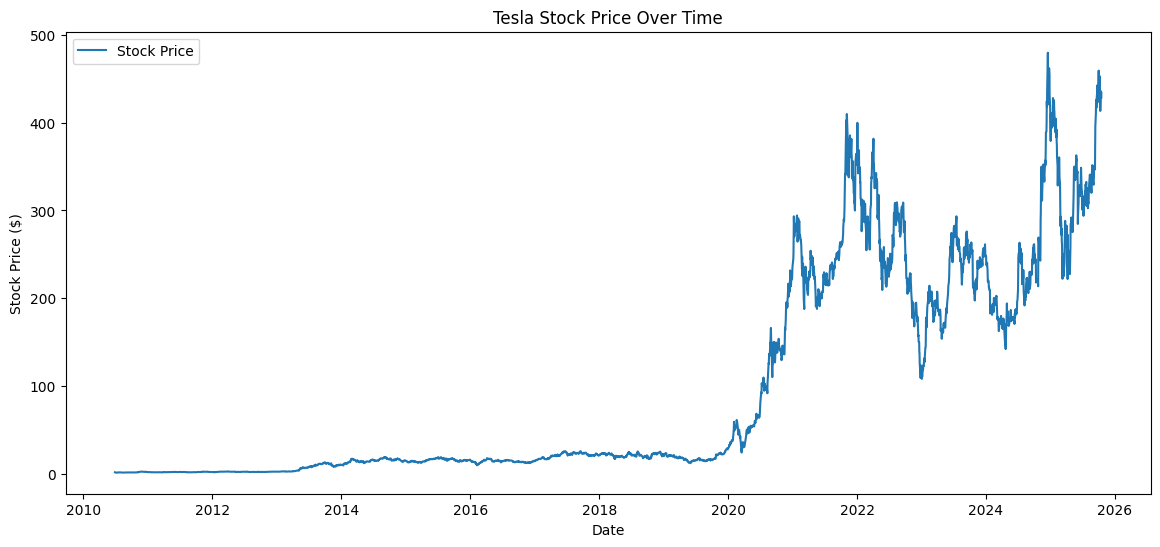

In [19]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price ($)")
    ax1.set_title(f"{stock} Stock Price Over Time")
    ax1.legend(loc="upper left")
    plt.show()

# Plot Tesla stock data
make_graph(tesla_data, tesla_revenue, "Tesla")


In [22]:
pip install lxml


Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import requests

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/118.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
response.raise_for_status()  


tables = pd.read_html(response.text)

for table in tables:
    if "Quarterly Revenue" in str(table.columns) or "Quarterly Revenue" in str(table):
        print(table)


   Tesla Quarterly Revenue (Millions of US $)  \
0                                  2025-06-30   
1                                  2025-03-31   
2                                  2024-12-31   
3                                  2024-09-30   
4                                  2024-06-30   
5                                  2024-03-31   
6                                  2023-12-31   
7                                  2023-09-30   
8                                  2023-06-30   
9                                  2023-03-31   
10                                 2022-12-31   
11                                 2022-09-30   
12                                 2022-06-30   
13                                 2022-03-31   
14                                 2021-12-31   
15                                 2021-09-30   
16                                 2021-06-30   
17                                 2021-03-31   
18                                 2020-12-31   
19                  

/tmp/ipykernel_656/1907687291.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text)


In [28]:
import pandas as pd
import requests
from io import StringIO

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/118.0 Safari/537.36"
}

response = requests.get(url, headers=headers)
response.raise_for_status()


tables = pd.read_html(StringIO(response.text))

for table in tables:
    if "Quarterly Revenue" in str(table.columns) or "Quarterly Revenue" in str(table):
        df = table.copy()
        break


df.columns = ["Date", "Revenue"]

df["Revenue"] = df["Revenue"].replace("[\$,]", "", regex=True).astype(float)

df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values("Date").reset_index(drop=True)

print(df.head())


df.to_csv("tesla_quarterly_revenue.csv", index=False)
print("\nOutput to tesla_quarterly_revenue.csv")


        Date  Revenue
0 2010-12-31     36.0
1 2011-03-31     49.0
2 2011-06-30     58.0
3 2011-09-30     58.0
4 2011-12-31     39.0

Output to tesla_quarterly_revenue.csv


In [32]:
import pandas as pd
import requests
from io import StringIO


tesla_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/118.0 Safari/537.36"
}


response = requests.get(tesla_url, headers=headers)
response.raise_for_status()


tables = pd.read_html(StringIO(response.text))


for table in tables:
    if "Quarterly Revenue" in str(table.columns) or "Quarterly Revenue" in str(table):
        tesla_revenue = table.copy()
        break


tesla_revenue.columns = ["Date", "Revenue"]


tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace("[\$,]", "", regex=True).astype(float)

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])

tesla_revenue = tesla_revenue.sort_values("Date").reset_index(drop=True)

tesla_revenue.tail()


,Date,Revenue
54,2024-06-30,25500.0
55,2024-09-30,25182.0
56,2024-12-31,25707.0
57,2025-03-31,19335.0
58,2025-06-30,22496.0


In [34]:
# GME Revenue
gme_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"


response = requests.get(gme_url, headers=headers)
response.raise_for_status()


tables = pd.read_html(StringIO(response.text))

for table in tables:
    if "Quarterly Revenue" in str(table.columns) or "Quarterly Revenue" in str(table):
        gme_revenue = table.copy()
        break


gme_revenue.columns = ["Date", "Revenue"]

gme_revenue["Revenue"] = gme_revenue["Revenue"].replace("[\$,]", "", regex=True).astype(float)

gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])

gme_revenue = gme_revenue.sort_values("Date").reset_index(drop=True)

gme_revenue.tail()


,Date,Revenue
55,2024-07-31,798.0
56,2024-10-31,860.0
57,2025-01-31,1283.0
58,2025-04-30,732.0
59,2025-07-31,972.0
